In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import multi_gpu_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片 
from skimage.io import imsave
import numpy as np
import os
import random

import tensorflow as tf
from PIL import Image #读取图像处理代码
import os.path
import glob

Using TensorFlow backend.


In [8]:

def convertjpg(jpgfile,outdir,width=256,height=256):
    img=Image.open(jpgfile)
    try:
        new_img=img.resize((width,height),Image.BILINEAR)   
        new_img.save(os.path.join(outdir,os.path.basename(jpgfile)))
    except Exception as e:
        print(e)
for jpgfile in glob.glob("../images/full/*.jpg"):
    convertjpg(jpgfile,"../images/full1/")
for jpgfile in glob.glob("../images/test/*.jpg"):
    convertjpg(jpgfile,"../images/test1/")

In [12]:
# Get images
X = []
for filename in os.listdir('../images/grouped/train_0/'):
    X.append(img_to_array(load_img('../images/grouped/train_0/'+filename)))
image = np.array(X, dtype=float)
image = np.array(image, dtype=float)

In [13]:
image.shape

(80, 256, 256, 3)

In [14]:
X = rgb2lab(1.0/255*image)[:,:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,:,1:]
Y /= 128
X = X.reshape(image.shape[0], 256, 256, 1)
Y = Y.reshape(image.shape[0], 256, 256, 2)

In [15]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [16]:
# Finish model
model.compile(optimizer='rmsprop',
			loss='mse')

In [17]:
history = model.fit(x=X, 
	y=Y,
	batch_size=5,
	epochs=20,validation_split=0.25)

Train on 60 samples, validate on 20 samples
Epoch 1/20
60/60 [==============================] - 17s 281ms/step - loss: 0.1388 - val_loss: 0.0314
Epoch 2/20
60/60 [==============================] - 14s 226ms/step - loss: 0.0378 - val_loss: 0.0328
Epoch 3/20
60/60 [==============================] - 15s 246ms/step - loss: 0.0361 - val_loss: 0.0303
Epoch 4/20
60/60 [==============================] - 16s 267ms/step - loss: 0.0354 - val_loss: 0.0426
Epoch 5/20
60/60 [==============================] - 17s 286ms/step - loss: 0.0399 - val_loss: 0.0318
Epoch 6/20
60/60 [==============================] - 16s 260ms/step - loss: 0.0364 - val_loss: 0.0304
Epoch 7/20
60/60 [==============================] - 16s 264ms/step - loss: 0.0349 - val_loss: 0.0329
Epoch 8/20
60/60 [==============================] - 15s 257ms/step - loss: 0.0360 - val_loss: 0.0298
Epoch 9/20
60/60 [==============================] - 17s 281ms/step - loss: 0.0363 - val_loss: 0.0790
Epoch 10/20
60/60 [============================

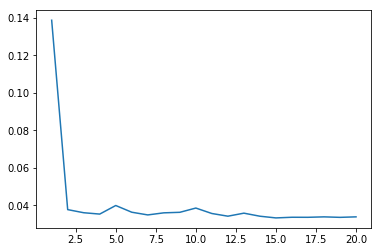

In [18]:
losses = history.history
loss = losses['loss']
epoch = np.arange(1, len(loss)+1, 1)
plt.plot(epoch, loss)

In [23]:
color_me = []
for filename in os.listdir('../images/test1/'):
    color_me.append(img_to_array(load_img('../images/test1/'+filename)))
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

# Test model
output = model.predict(color_me)
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    imsave("result/img_"+str(i)+".png", lab2rgb(cur))



d:\python\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
d:\python\lib\site-packages\skimage\color\colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 15 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
